In [3]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_moons
from scipy.spatial.distance import pdist, squareform
import scipy
import matplotlib.pyplot as plt
import numpy.linalg as LA

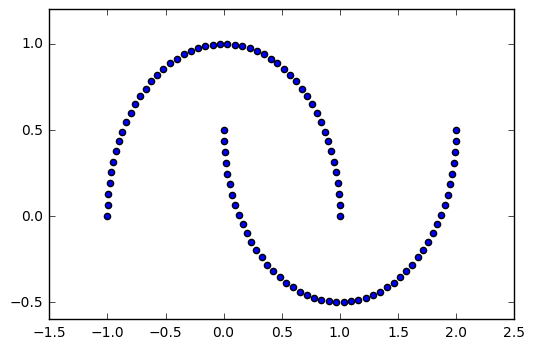

X shape (100, 2)
Cluster membership: [1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 1 0 1 0
 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1]


In [4]:
num_samples = 100
num_features = 2
X, y = make_moons(n_samples = num_samples)
plt.scatter(X[:,0], X[:,1])
plt.show()
print('X shape', X.shape)
# print('X')
# print(X)
print('Cluster membership:', y)

In [8]:
def kernel_matrix(X, gamma):
    n = X.shape[0]
    K = np.zeros((n, n))
    sq_dists = pdist(X, 'sqeuclidean')
    mat_sq_dists = squareform(sq_dists)
    K = scipy.exp(-gamma * mat_sq_dists)
    return K

def rbf_value(x, y, gamma):
    diff = x - y
    dif_norm = LA.norm(diff)**2
    prod = -1.0 * dif_norm * gamma
    rbf_value = np.exp(prod)
    return rbf_value
    

In [27]:
num_means = 2
gamma = 0.5
print('Num samples:', num_samples, 'K:',num_means)
A = np.zeros((num_samples, num_means))
K = kernel_matrix(X, gamma)
print('Dim of a:', A.shape)
print('Dim of k:', K.shape)

means = np.random.random((num_means, num_features))
print('Randomly chosen means:', means)

Num samples: 100 K: 2
Dim of a: (100, 2)
Dim of k: (100, 100)
Randomly chosen means: [[ 0.88304072  0.52811567]
 [ 0.29727683  0.9570953 ]]


In [35]:
# Initial assigment of samples to our means
dist_mean = np.zeros(num_means)
for i in range(num_samples):
    for j in range(num_means):
        dist_mean[j] = rbf_value(X[i], X[i], gamma) - 2*rbf_value(X[i], means[j], gamma) + rbf_value(means[j], means[j], gamma)
    assigned_mean = np.argmin(dist_mean)
#     print('i:', i,'assigned mean:n', assigned_mean)
    A[i, assigned_mean] = 1

# print('Assigned Mean')
# print(A)
        

In [36]:
def distance_transformed(i, j, K, A):
    distance = 0
    num_samples = a.shape[0]
    num_means = a.shape[1]
    mod_means = np.zeros(num_means)
    mod_means = np.sum(a[:, j])
    distance += K[i, i]
    middle = 0
    for idx in range(num_samples):
        middle += (A[idx, j] * K[i, idx])
    middle = 2*middle/mod_means
    distance -= middle
    last = 0
    for idx in range(num_samples):
        for jdx in range(num_samples):
            last += A[idx, j] * A[jdx, j] * K[idx, jdx]
    last = last/(mod_means**2)
    distance += last
    return distance
    
    
    

In [49]:
num_iterations = 3
dist_mean = np.zeros(num_means)
for k in range(num_iterations):
    new_A = np.zeros((num_samples, num_means))
    for i in range(num_samples):
        for j in range(num_means):
            dist_mean[j] = distance_transformed(i, j, K, A)
        assigned_mean = np.argmin(dist_mean)
#         print('num_iterations',k,'i:', i,'assigned mean:n', assigned_mean)
        new_A[i, assigned_mean] = 1
    A = new_A

Cluster 1 size (48, 2)
Cluster 2 size (52, 2)


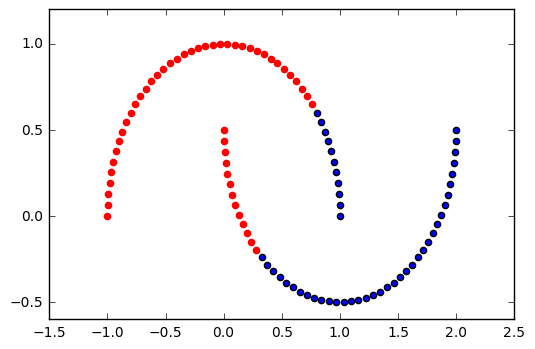

In [48]:
bool_idx = A[:,0] > 0
bool_idx
cluster1 = X[bool_idx,:]
print('Cluster 1 size', cluster1.shape)
bool_idx = A[:,0] == 0
cluster2 = X[bool_idx,:]
print('Cluster 2 size', cluster2.shape)
plt.scatter(cluster1[:,0], cluster1[:,1])
plt.scatter(cluster2[:,0], cluster2[:,1], color='r')
plt.show()
